In [77]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

penguins = sns.load_dataset("penguins")
titanic = sns.load_dataset("titanic")

In [67]:
import matplotlib.font_manager as font_manager
import matplotlib as mpl
# Add every font at the specified location
font_dir = ['C:/python/fonts']
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    font_manager.fontManager.addfont(font)
# Set font family globally
mpl.rcParams['font.family'] = 'Noto Sans KR'
print(mpl.rcParams['font.family'])
mpl.rcParams["axes.unicode_minus"] = False

Noto Sans KR
Noto Sans KR
Noto Sans KR
Noto Sans KR
Noto Sans KR
Noto Sans KR
['Noto Sans KR']


In [123]:
survey_raw_df = pd.read_csv('data/survey_results_public.csv', index_col = "ResponseId")
schema_raw = pd.read_csv('data/survey_results_schema.csv', index_col="qname")["question"]
pd.set_option('display.max_columns', 78)
pd.set_option('display.max_rows', 78)
selected_columns = [
    # 인구 통계
    'Country',
    'Age',
    'Gender',
    'EdLevel', # 학력
    # 프로그래밍 경험
    'YearsCode', # 코딩 경험
    'YearsCodePro', # 코딩 경력
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'LearnCodeCoursesCert',
    'ProfessionalTech',
    'SOAccount',
    # 고용 관련 정보
    'Employment',
    'DevType',
    'WorkExp',
]
survey_df = survey_raw_df[selected_columns].copy()
mpl.rcParams["axes.facecolor"] = "white"
survey_df.where(~(survey_df["Gender"].str.contains(";", na=False)), np.nan, inplace=True)
survey_df

Country  \
ResponseId                                                      
1                                                         NaN   
2                                                      Canada   
3           United Kingdom of Great Britain and Northern I...   
4                                                      Israel   
5                                    United States of America   
...                                                       ...   
73264                                                 Nigeria   
73265                                United States of America   
73266                                United States of America   
73267       United Kingdom of Great Britain and Northern I...   
73268                                                  Canada   

                        Age Gender  \
ResponseId                           
1                       NaN    NaN   
2                       NaN    NaN   
3           25-34 years old    Man   
4           35-44 years old    Man   
5           25-34 years old    NaN   
...                     ...    ...   
73264       25-34 years old    Man   
73265       25-34 years old    Man   
73266       55-64 years old    Man   
73267       55-64 years old    Man   
73268       25-34 years old    Man   

                                                    EdLevel YearsCode  \
ResponseId                                                              
1                                                       NaN       NaN   
2                                                       NaN       NaN   
3           Master’s degree (M.A., M.S., M.Eng., MBA, etc.)        14   
4              Bachelor’s degree (B.A., B.S., B.Eng., etc.)        20   
5              Bachelor’s degree (B.A., B.S., B.Eng., etc.)         8   
...                                                     ...       ...   
73264          Bachelor’s degree (B.A., B.S., B.Eng., etc.)         8   
73265       Master’s degree (M.A., M.S., M.Eng., MBA, etc.)         6   
73266          Bachelor’s degree (B.A., B.S., B.Eng., etc.)        42   
73267          Bachelor’s degree (B.A., B.S., B.Eng., etc.)        50   
73268          Bachelor’s degree (B.A., B.S., B.Eng., etc.)        16   

           YearsCodePro                             LanguageHaveWorkedWith  \
ResponseId                                                                   
1                   NaN                                                NaN   
2                   NaN                              JavaScript;TypeScript   
3                     5                  C#;C++;HTML/CSS;JavaScript;Python   
4                    17                       C#;JavaScript;SQL;TypeScript   
5                     3        C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript   
...                 ...                                                ...   
73264                 5  Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...   
73265                 5          Bash/Shell;HTML/CSS;JavaScript;Python;SQL   
73266                33                 HTML/CSS;JavaScript;PHP;Python;SQL   
73267                31                                      C#;Delphi;VBA   
73268                 5        C#;JavaScript;Lua;PowerShell;SQL;TypeScript   

                                    LanguageWantToWorkWith  \
ResponseId                                                   
1                                                      NaN   
2                                          Rust;TypeScript   
3                    C#;C++;HTML/CSS;JavaScript;TypeScript   
4                                        C#;SQL;TypeScript   
5               C#;Elixir;F#;Go;JavaScript;Rust;TypeScript   
...                                                    ...   
73264       Bash/Shell;Go;JavaScript;Python;SQL;TypeScript   
73265                           HTML/CSS;JavaScript;Python   
73266                C#;HTML/CSS;JavaScript;PHP;Python;SQL   
73267                                               Delphi   
7326

In [86]:
schema_raw.DevType

'Which of the following describes your current job? Please select all that apply.'

In [70]:
survey_df.DevType.count()

61302

In [71]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                                                                                                                                                                                                                                                  7142
Developer, back-end                                                                                                                                                                                                                                                                                                                                                                                                                    5301
Developer, front-end                                                                                                                            

### 연습문제
DevType column을 제일 작은 단위의 응답 항목으로 나누너 DataFrame 형태로 만들어 보도록 하겠습니다.

- NaN 값을 갖는 row는 모두 False값을 갖도록 처리한다.
- series를 인자로 받아옵니다.
- value의 구분자는 ';'입니다.
- series는 items() 메서드를 사용하여 루프할 수 있습니다.
- 반환 값으로 각 제일 작은 단위의 응답 항목을 column으로 갖는 DataFrame을 줍니다.
- 응답자가 제일 작은 단위의 기술 스택을 선택한 경우 해당 열의 값을 True로, 아닌 경우 False로 합니다.

In [96]:
def split_multicolumn(col_series):
    # 반환할 DataFrame이자 최초의 col_series도 담는다.
    result_df = pd.DataFrame(col_series.values, index=col_series.index, columns=["DevType"])
    # result_df = col_series.to_frame() --> 위의 코드와 같다.
    # 기술 스텍 목록을 담았다가 마지막 반환할 때 인덱싱으로 활용
    options = []
    # NaN 값을 갖는 row를 제외하고 반복
    for idx, value  in col_series[col_series.notnull()].items():
        # value를 가져와 ';'를 기준으로 분리하여 각 기술 스텍 문자열 리스트를 만든다.
        for option in value.split(';'):
            # 현재 option이 result_df.columns에 없으면 추가한다.
            if option not in result_df.columns:
                options.append(option)
                result_df[option] = False
            # 파싱한 기술 스텍에 해당하는 column의 값에 True를 넣는다.
            result_df.at[idx, option] = True
            # result_df.loc[idx, option] = True
    return result_df[options]
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html

dev_type_df = split_multicolumn(survey_df.DevType)
dev_type_df

Data scientist or machine learning specialist  \
ResponseId                                                  
1                                                   False   
2                                                   False   
3                                                    True   
4                                                   False   
5                                                   False   
...                                                   ...   
73264                                               False   
73265                                                True   
73266                                               False   
73267                                               False   
73268                                               False   

            Developer, front-end  Engineer, data  Engineer, site reliability  \
ResponseId                                                                     
1                          False           False                       False   
2                          False           False                       False   
3                           True            True                        True   
4                          False           False                       False   
5                           True           False                       False   
...                          ...             ...                         ...   
73264                      False           False                       False   
73265                      False           False                       False   
73266                      False           False                       False   
73267                       True           False                       False   
73268                       True            True                        True   

            Developer, full-stack  Developer, back-end  \
ResponseId                                               
1                           False                False   
2                           False                False   
3                           False                False   
4                            True                False   
5                            True                 True   
...                           ...                  ...   
73264                       False                 True   
73265                       False                False   
73266                        True                False   
73267                       False                False   
73268                        True                 True   

            Developer, desktop or enterprise applications  \
ResponseId                                                  
1                                                   False   
2                                                   False   
3                                                   False   
4                                                   False   
5                                                    True   
...                                                   ...   
73264                                               False   
73265                                               False   
73266                                                True   
73267                                                True   
73268                                                True   

            Developer, QA or test  Student  Developer, mobile  Educator  \
ResponseId                                                                
1                           False    False              False     False   
2                           False    False              False     False   
3                           False    False              False     False   
4                           False    False              False     False   
5                            True    False              False     False   
...                           ...      ...                ...       ...   
73264                       

In [36]:
def split_multicolumn_1(Series):
    df = pd.DataFrame(False, columns = (Series.dropna().str.split(';').str[0].unique()), index = Series.index)
    # for idx, rep in Series[Series.notnull()].str.split(';').items:
    #     for one in rep:
    #         df.at[idx, one.strip()] = True
    for idx, rep in Series.str.split(';').items():
        # NaN이 아닌 값을 분기
        if isinstance(rep, list):
            for one in rep:
                df.at[idx, one.strip()] = True
        else :
            pass
    return df
split_multicolumn_1(survey_df['DevType'])

Data scientist or machine learning specialist  \
ResponseId                                                  
1                                                   False   
2                                                   False   
3                                                    True   
4                                                   False   
5                                                   False   
...                                                   ...   
73264                                               False   
73265                                                True   
73266                                               False   
73267                                               False   
73268                                               False   

            Developer, full-stack  Developer, front-end  Developer, back-end  \
ResponseId                                                                     
1                           False                 False                False   
2                           False                 False                False   
3                           False                  True                False   
4                            True                 False                False   
5                            True                  True                 True   
...                           ...                   ...                  ...   
73264                       False                 False                 True   
73265                       False                 False                False   
73266                        True                 False                False   
73267                       False                  True                False   
73268                        True                  True                 True   

            Developer, desktop or enterprise applications  \
ResponseId                                                  
1                                                   False   
2                                                   False   
3                                                   False   
4                                                   False   
5                                                    True   
...                                                   ...   
73264                                               False   
73265                                               False   
73266                                                True   
73267                                                True   
73268                                                True   

            Engineering manager  Engineer, data  Student  \
ResponseId                                                 
1                         False           False    False   
2                         False           False    False   
3                         False            True    False   
4                         False           False    False   
5                         False           False    False   
...                         ...             ...      ...   
73264                     False           False    False   
73265                     False           False    False   
73266                     False           False    False   
73267                     False           False    False   
73268                     False            True     True   

            Other (please specify):  Engineer, site reliability  \
ResponseId                                                        
1                             False                       False   
2                             False                       False   
3                             False                        True   
4                             False                       False   
5                             False                       False   
...                             ...                         ...   
73264                         False                       False   

In [80]:
temp = []
for _, value in survey_df["DevType"].dropna().items():
    temp.extend(value.split(';'))
temp
result = list(set(temp))
result

['Cloud infrastructure engineer',
 'Developer, full-stack',
 'Engineer, site reliability',
 'Developer, mobile',
 'Developer, QA or test',
 'Developer, game or graphics',
 'Senior Executive (C-Suite, VP, etc.)',
 'Developer, desktop or enterprise applications',
 'Developer, back-end',
 'Student',
 'Security professional',
 'Data or business analyst',
 'Designer',
 'System administrator',
 'Engineer, data',
 'Product manager',
 'Blockchain',
 'Database administrator',
 'Scientist',
 'Educator',
 'Marketing or sales professional',
 'Academic researcher',
 'Developer, embedded applications or devices',
 'Project manager',
 'Data scientist or machine learning specialist',
 'Other (please specify):',
 'DevOps specialist',
 'Developer, front-end',
 'Engineering manager']

In [40]:
result = set(temp)
result

{'Academic researcher',
 'Blockchain',
 'Cloud infrastructure engineer',
 'Data or business analyst',
 'Data scientist or machine learning specialist',
 'Database administrator',
 'Designer',
 'DevOps specialist',
 'Developer, QA or test',
 'Developer, back-end',
 'Developer, desktop or enterprise applications',
 'Developer, embedded applications or devices',
 'Developer, front-end',
 'Developer, full-stack',
 'Developer, game or graphics',
 'Developer, mobile',
 'Educator',
 'Engineer, data',
 'Engineer, site reliability',
 'Engineering manager',
 'Marketing or sales professional',
 'Other (please specify):',
 'Product manager',
 'Project manager',
 'Scientist',
 'Security professional',
 'Senior Executive (C-Suite, VP, etc.)',
 'Student',
 'System administrator'}

### 연습문제
각 역할별로 개수를 갖는 오른쪽과 같은 결과를 갖는 series를 만들어 보세요.
- 앞서 구한 데이터프레임을 활용하여 column 별 집계(sum)을 이용합니다.

In [97]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, full-stack                            28433
Developer, back-end                              26369
Developer, front-end                             15739
Developer, desktop or enterprise applications     9451
Developer, mobile                                 7566
DevOps specialist                                 6093
Student                                           5503
Cloud infrastructure engineer                     5215
Database administrator                            4872
System administrator                              4828
Developer, embedded applications or devices       3871
Project manager                                   3844
Designer                                          3712
Engineer, data                                    3558
Engineering manager                               3534
Data scientist or machine learning specialist     3377
Data or business analyst                          3166
Developer, QA or test                             3045
Academic r

### 연습문제
각 역할별로 퍼센트를 갖는 오른쪽과 같은 결과를 갖는 series를 만들어 보세요.
- 전체 합이 100이 되어야 합니다.
- devtype_percentage로 명명합니다.

In [98]:
devtype_percentage = dev_type_totals = dev_type_totals/dev_type_totals.sum() * 100
devtype_percentage

Developer, full-stack                            17.462842
Developer, back-end                              16.195185
Developer, front-end                              9.666503
Developer, desktop or enterprise applications     5.804569
Developer, mobile                                 4.646849
DevOps specialist                                 3.742169
Student                                           3.379806
Cloud infrastructure engineer                     3.202923
Database administrator                            2.992261
System administrator                              2.965238
Developer, embedded applications or devices       2.377472
Project manager                                   2.360889
Designer                                          2.279818
Engineer, data                                    2.185235
Engineering manager                               2.170495
Data scientist or machine learning specialist     2.074070
Data or business analyst                          1.9444

In [100]:
devtype_percentage.sum()

99.99999999999997

### 연습문제
각 역할별로 퍼센트를 갖는 오른쪽과 같은 결과를 갖는 그래프를 그려보세요.
- figsize: 12 x 12
- x label: Percentage
- y label: None

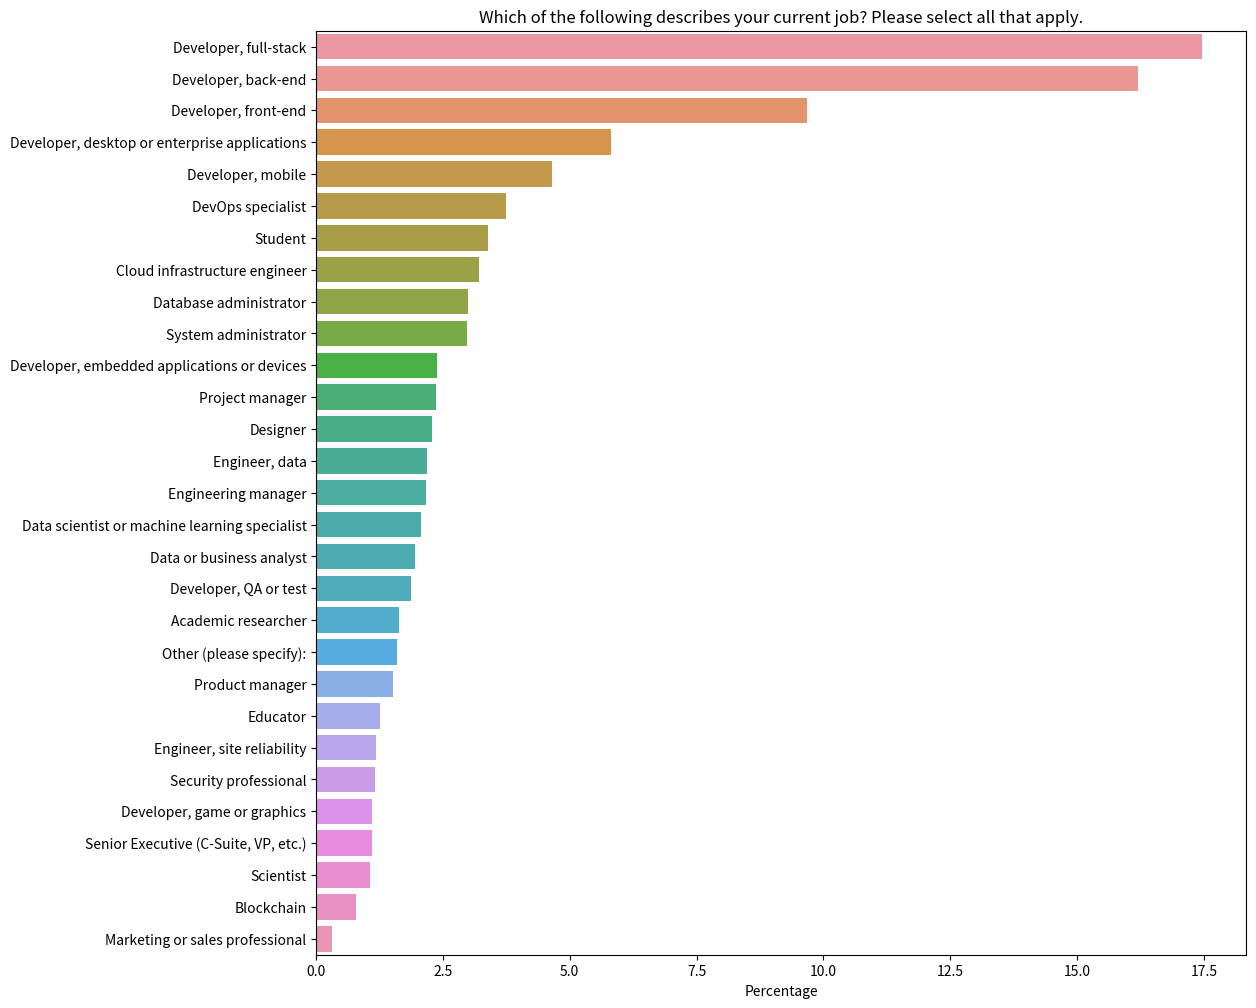

In [108]:
plt.figure(figsize=(12, 12))
sns.barplot(x=devtype_percentage, y=devtype_percentage.index)
plt.title(schema_raw["DevType"])
plt.xlabel("Percentage")
plt.show()

In [110]:
def split_multicolumn(col_series):
    # 반환할 DataFrame이자 최초의 col_series도 담는다.
    result_df = pd.DataFrame(col_series.values, index=col_series.index, columns=["DevType"])
    # result_df = col_series.to_frame() --> 위의 코드와 같다.
    # 기술 스텍 목록을 담았다가 마지막 반환할 때 인덱싱으로 활용
    options = []
    # NaN 값을 갖는 row를 제외하고 반복
    for idx, value  in col_series[col_series.notnull()].items():
        # value를 가져와 ';'를 기준으로 분리하여 각 기술 스텍 문자열 리스트를 만든다.
        for option in value.split(';'):
            # 현재 option이 result_df.columns에 없으면 추가한다.
            if option not in result_df.columns:
                options.append(option)
                result_df[option] = False
            # 파싱한 기술 스텍에 해당하는 column의 값에 True를 넣는다.
            result_df.at[idx, option] = True
            # result_df.loc[idx, option] = True
    return result_df[options]
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html

lang_work_df = split_multicolumn(survey_df.LanguageHaveWorkedWith)
lang_work_df

JavaScript  TypeScript     C#    C++  HTML/CSS  Python    SQL  \
ResponseId                                                                  
1                False       False  False  False     False   False  False   
2                 True        True  False  False     False   False  False   
3                 True       False   True   True      True    True  False   
4                 True        True   True  False     False   False   True   
5                 True        True   True  False      True   False   True   
...                ...         ...    ...    ...       ...     ...    ...   
73264             True        True  False  False     False    True   True   
73265             True       False  False  False      True    True   True   
73266             True       False  False  False      True    True   True   
73267            False       False   True  False     False   False  False   
73268             True        True   True  False     False   False   True   

            Swift    Lua    PHP      C   Java  Delphi  Bash/Shell  PowerShell  \
ResponseId                                                                      
1           False  False  False  False  False   False       False       False   
2           False  False  False  False  False   False       False       False   
3           False  False  False  False  False   False       False       False   
4           False  False  False  False  False   False       False       False   
5            True  False  False  False  False   False       False       False   
...           ...    ...    ...    ...    ...     ...         ...         ...   
73264       False  False   True  False  False   False        True       False   
73265       False  False  False  False  False   False        True       False   
73266       False  False   True  False  False   False       False       False   
73267       False  False  False  False  False    True       False       False   
73268       False   True  False  False  False   False       False        True   

             Rust  Elixir  Erlang   Ruby      R  Scala    VBA   Dart     Go  \
ResponseId                                                                    
1           False   False   False  False  False  False  False  False  False   
2           False   False   False  False  False  False  False  False  False   
3           False   False   False  False  False  False  False  False  False   
4           False   False   False  False  False  False  False  False  False   
5           False   False   False  False  False  False  False  False  False   
...           ...     ...     ...    ...    ...    ...    ...    ...    ...   
73264       False   False   False  False  False  False  False   True  False   
73265       False   False   False  False  False  False  False  False  False   
73266       False   False   False  False  False  False  False  False  False   
73267       False   False   False  False  False  False   True  False  False   
73268       False   False   False  False  False  False  False  False  False   

            Kotlin  Groovy  MATLAB   Perl  Haskell  Julia   LISP  Assembly  \
ResponseId                                                                   
1            False   False   False  False    False  False  False     False   
2            False   False   False  False    False  False  False     False   
3            False   False   False  False    False  False  False     False   
4            False   False   False  False    False  False  False     False   
5            False   False   False  False    False  False  False     False   
...            ...     ...     ...    ...      ...    ...    ...       ...   
73264        False   False   False  False    False  False  False     False   
73265        False   False   False  False    False  False  False     False   
73266        False   False   False  False    False  False  False     False   
73267        False   False   False  False    False  False  False     F

ResponseId
1                                                      NaN
2                                    JavaScript;TypeScript
3                        C#;C++;HTML/CSS;JavaScript;Python
4                             C#;JavaScript;SQL;TypeScript
5              C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript
                               ...                        
73264    Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...
73265            Bash/Shell;HTML/CSS;JavaScript;Python;SQL
73266                   HTML/CSS;JavaScript;PHP;Python;SQL
73267                                        C#;Delphi;VBA
73268          C#;JavaScript;Lua;PowerShell;SQL;TypeScript
Name: LanguageHaveWorkedWith, Length: 73268, dtype: object


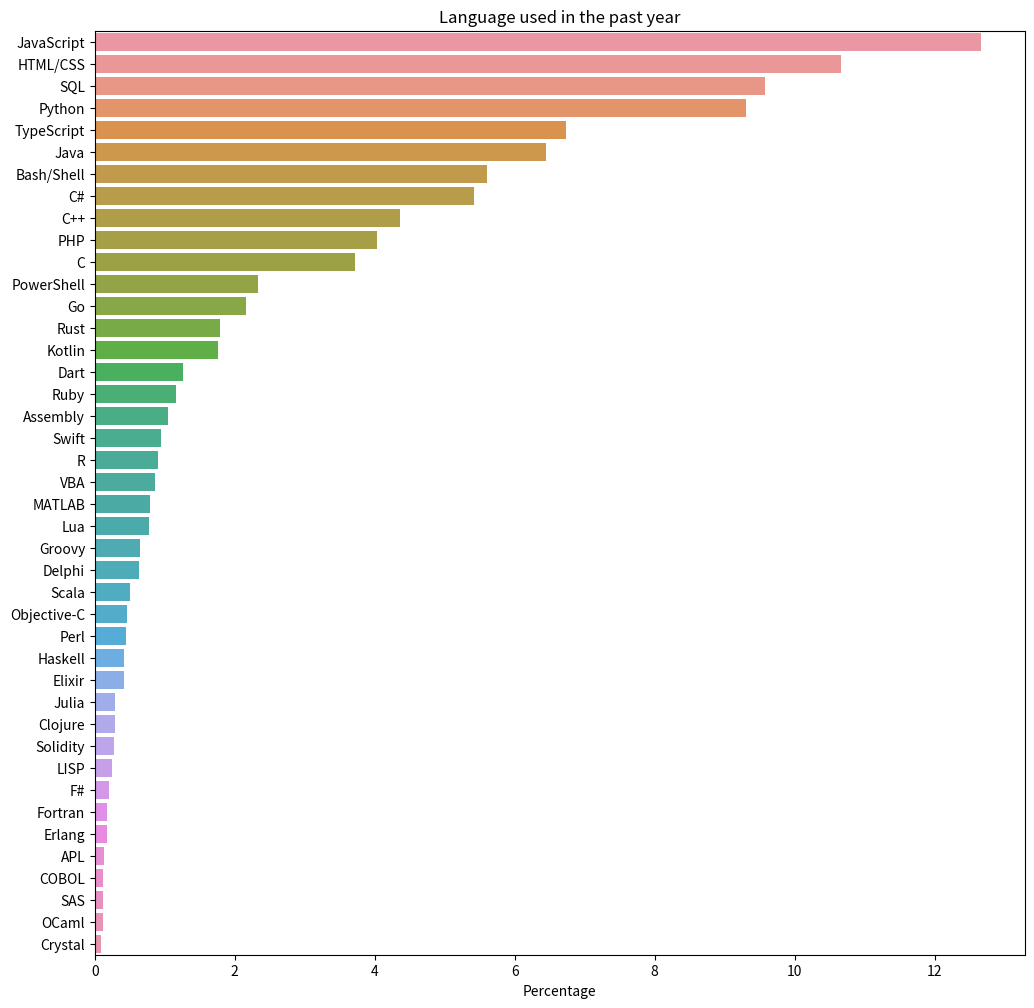

In [116]:
print(survey_df.LanguageHaveWorkedWith)
lang_work_totals = lang_work_df.sum().sort_values(ascending=False)
langwork_percentage = lang_work_totals = lang_work_totals/lang_work_totals.sum() * 100

plt.figure(figsize=(12, 12))
sns.barplot(x=langwork_percentage, y=langwork_percentage.index)
plt.title("Language used in the past year")
plt.xlabel("Percentage")
plt.show()

In [129]:
home_country = survey_df[(survey_df.Country == 'South Korea') | (survey_df["Country"] == "Republic of Korea")]
home_country

Country              Age             Gender  \
ResponseId                                                          
1289              South Korea  25-34 years old  Prefer not to say   
2933        Republic of Korea  35-44 years old                Man   
2991              South Korea  25-34 years old                Man   
3024              South Korea  25-34 years old                Man   
3161              South Korea  18-24 years old                Man   
...                       ...              ...                ...   
70985             South Korea  45-54 years old              Woman   
71427             South Korea  25-34 years old                Man   
72114       Republic of Korea  25-34 years old                Man   
72244             South Korea  25-34 years old                Man   
73026             South Korea  35-44 years old                Man   

                                                      EdLevel YearsCode  \
ResponseId                                                                
1289             Bachelor’s degree (B.A., B.S., B.Eng., etc.)         6   
2933          Master’s degree (M.A., M.S., M.Eng., MBA, etc.)        12   
2991          Master’s degree (M.A., M.S., M.Eng., MBA, etc.)        11   
3024        Some college/university study without earning ...         8   
3161                      Associate degree (A.A., A.S., etc.)         6   
...                                                       ...       ...   
70985         Master’s degree (M.A., M.S., M.Eng., MBA, etc.)        25   
71427            Bachelor’s degree (B.A., B.S., B.Eng., etc.)         4   
72114            Bachelor’s degree (B.A., B.S., B.Eng., etc.)         3   
72244            Bachelor’s degree (B.A., B.S., B.Eng., etc.)        15   
73026            Bachelor’s degree (B.A., B.S., B.Eng., etc.)        20   

                YearsCodePro  \
ResponseId                     
1289                     NaN   
2933                      10   
2991                       5   
3024                       5   
3161                     NaN   
...                      ...   
70985                     21   
71427       Less than 1 year   
72114       Less than 1 year   
72244                      7   
73026                     16   

                                       LanguageHaveWorkedWith  \
ResponseId                                                      
1289                                                     Rust   
2933                                              Python;Rust   
2991                           C++;HTML/CSS;JavaScript;Python   
3024            Bash/Shell;Go;JavaScript;OCaml;SQL;TypeScript   
3161                         C#;Go;JavaScript;Rust;TypeScript   
...                                                       ...   
70985               C;C++;HTML/CSS;Java;JavaScript;Python;SQL   
71427                                                     NaN   
72114                                          Python;R;Swift   
72244       Assembly;Bash/Shell;C;C#;C++;HTML/CSS;JavaScri...   
73026                                      C;Java;Objective-C   

                                       LanguageWantToWorkWith  \
ResponseId                                                      
1289                                                     Rust   
2933                                   Python;Rust;TypeScript   
2991                           C++;JavaScript;Rust;TypeScript   
3024        Bash/Shell;Crystal;Elixir;Erlang;F#;Go;JavaScr...   
3161                                                  C#;Rust   
...                                                       ...   
70985          HTML/CSS;Java;JavaScript;Python;SQL;TypeScript   
71427                                                     NaN   
72114                     JavaScript;Kotlin;Objective-C;Swift   
72244       Bash/Shell;Dart;Go;HTML/CSS;JavaScript;Solidit...   
73026                                           Go;JavaScript   

                 LearnCodeCoursesCert  

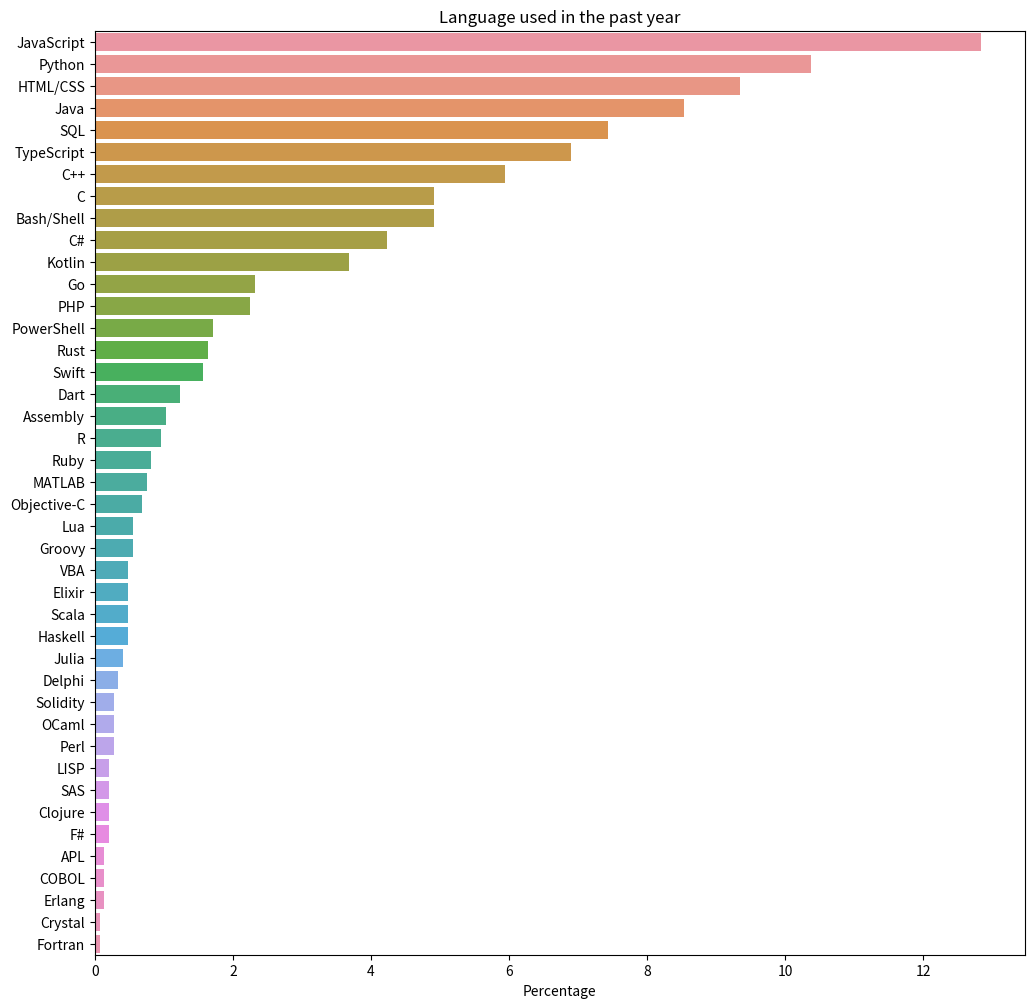

In [131]:
home_country = survey_df[(survey_df.Country == 'South Korea') | (survey_df["Country"] == "Republic of Korea")]
home_languages_worked_df = split_multicolumn(home_country.LanguageHaveWorkedWith)
home_languages_worked_totals = home_languages_worked_df.sum().sort_values(ascending=False)
home_langwork_percentage = home_languages_worked_totals =home_languages_worked_totals/home_languages_worked_totals.sum() * 100
# home_languages_worked_percentages = home_
plt.figure(figsize=(12, 12))
sns.barplot(x=home_langwork_percentage, y=home_langwork_percentage.index)
plt.title("Language used in the past year")
plt.xlabel("Percentage")
plt.show()

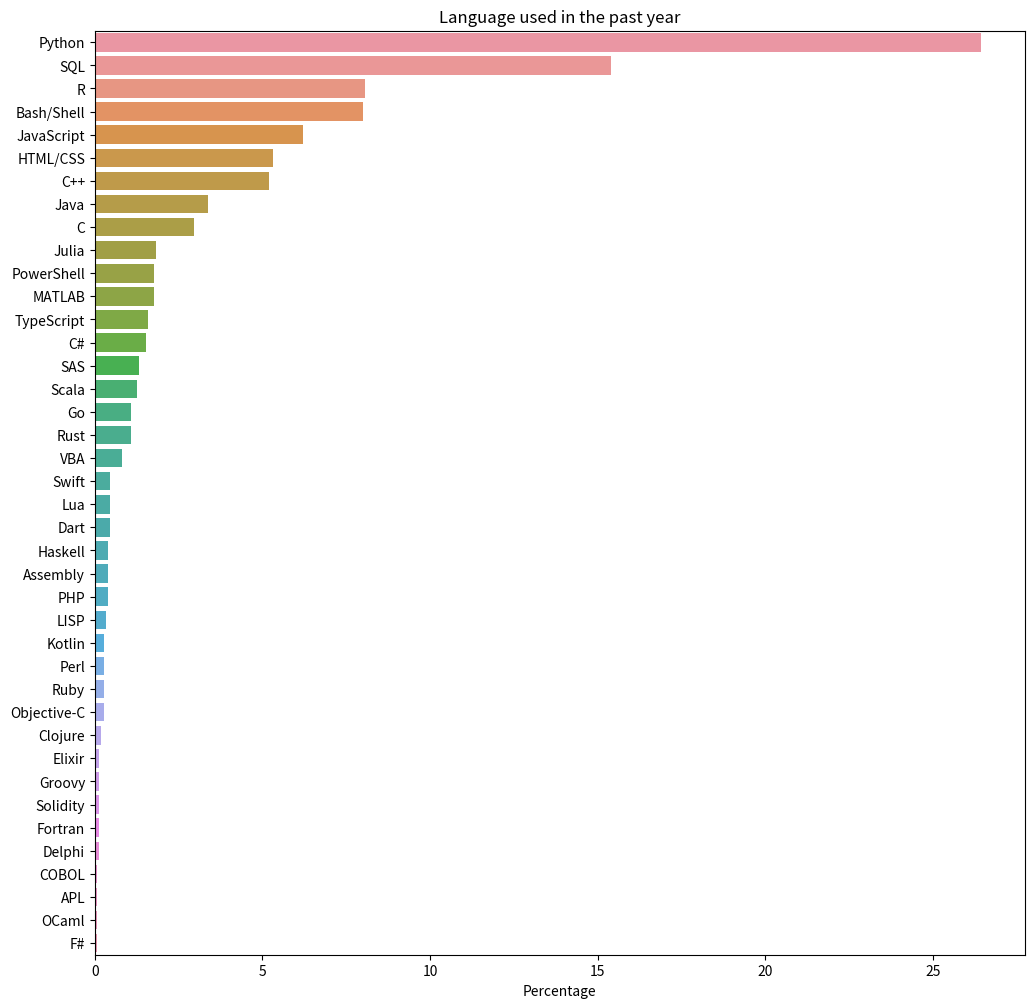

In [134]:
data_scientist = survey_df[survey_df.DevType == 'Data scientist or machine learning specialist']
ds_languages_worked_df = split_multicolumn(data_scientist.LanguageHaveWorkedWith)
ds_languages_worked_totals = ds_languages_worked_df.sum().sort_values(ascending=False)
data_langwork_percentage = ds_languages_worked_totals =ds_languages_worked_totals/ds_languages_worked_totals.sum() * 100
# home_languages_worked_percentages = home_
plt.figure(figsize=(12, 12))
sns.barplot(x=data_langwork_percentage, y=data_langwork_percentage.index)
plt.title("Language used in the past year")
plt.xlabel("Percentage")
plt.show()

### 연습문제
내년에 가장 많은 사람들이 배우고 싶어하는 언어는 무엇일까요? x축을 전체에서 차지하는 비율로 하는 글프로 표현해보세요.

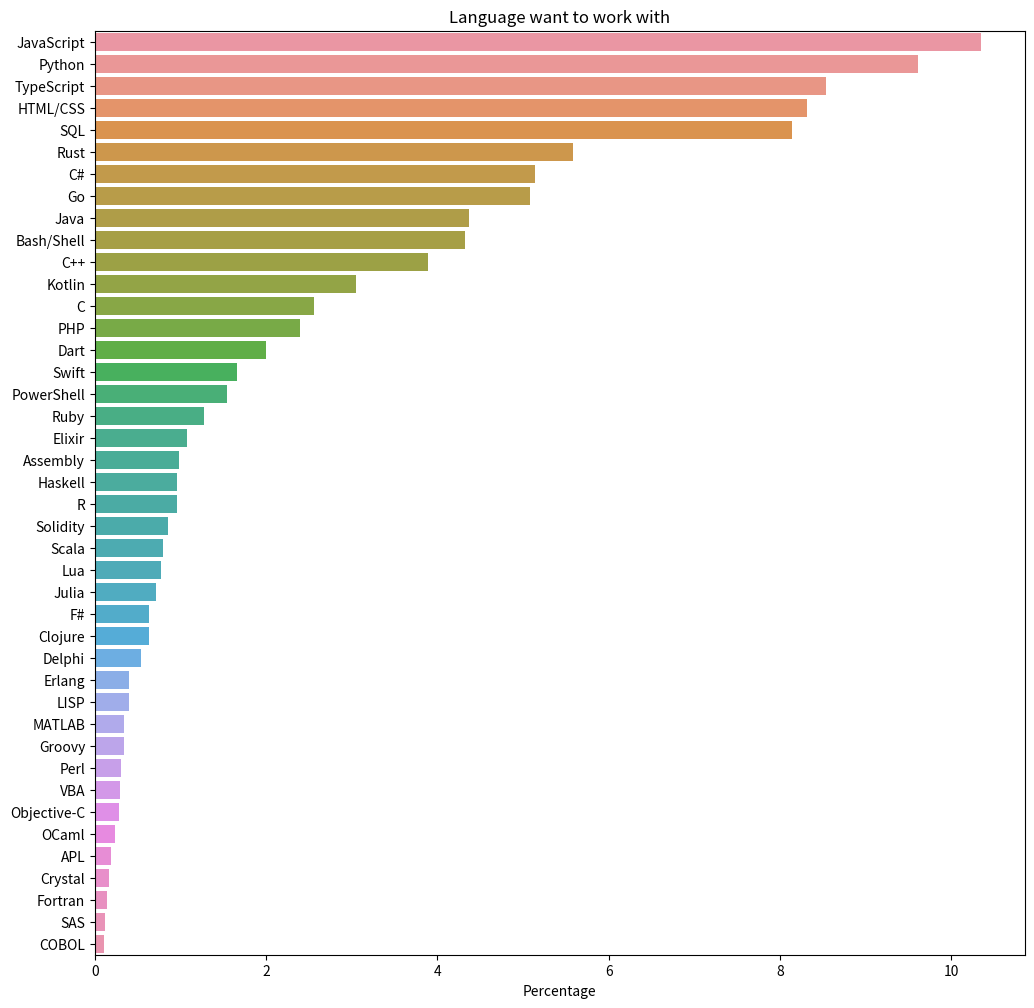

In [138]:
lang_want_df = split_multicolumn(survey_df.LanguageWantToWorkWith)
lang_want_totals = lang_want_df.sum().sort_values(ascending=False)
lang_want_percentage = lang_want_totals =lang_want_totals/lang_want_totals.sum() * 100

plt.figure(figsize=(12, 12))
sns.barplot(x=lang_want_percentage, y=lang_want_percentage.index)
plt.title("Language want to work with")
plt.xlabel("Percentage")
plt.show()

### 연습문제
2022년 데이터베이스에 가장 많이 사용되는 언어는 무엇입니까? x푹을 전체에서 차지하는 비율로 하는 그래프를 표현해보세요.

In [140]:
survey_raw_df.DatabaseHaveWorkedWith

ResponseId
1                                                      NaN
2                                                      NaN
3                                     Microsoft SQL Server
4                                     Microsoft SQL Server
5        Cloud Firestore;Elasticsearch;Microsoft SQL Se...
                               ...                        
73264                 Elasticsearch;MySQL;PostgreSQL;Redis
73265                  Elasticsearch;MongoDB;Oracle;SQLite
73266    MariaDB;Microsoft SQL Server;MySQL;PostgreSQL;...
73267                  Microsoft SQL Server;MongoDB;Oracle
73268                     Microsoft SQL Server;Neo4j;Redis
Name: DatabaseHaveWorkedWith, Length: 73268, dtype: object

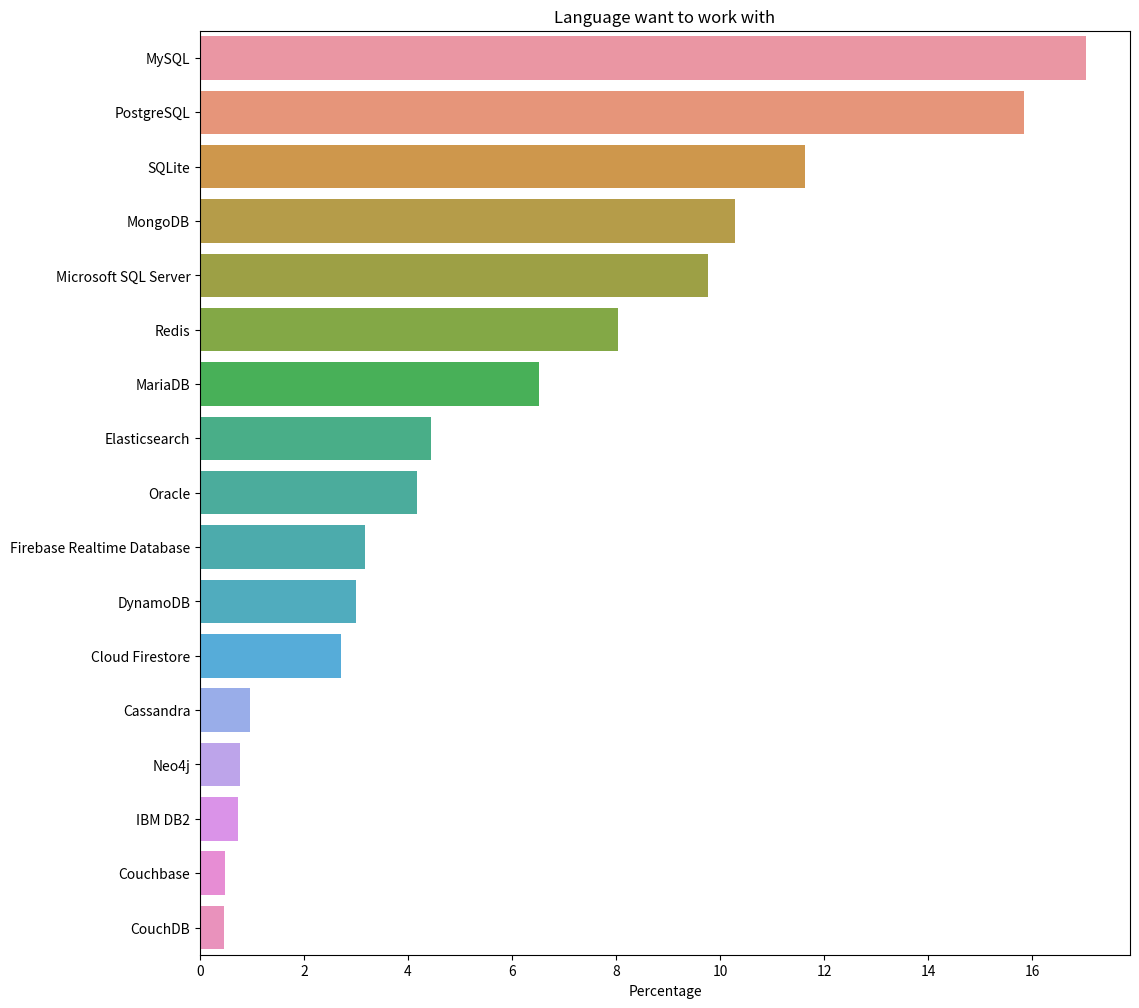

In [142]:
dB_df = split_multicolumn(survey_raw_df.DatabaseHaveWorkedWith)
dB_totals = dB_df.sum().sort_values(ascending=False)
db_totals_percentage = dB_totals =dB_totals/dB_totals.sum() * 100

plt.figure(figsize=(12, 12))
sns.barplot(x=db_totals_percentage, y=db_totals_percentage.index)
plt.title("Language want to work with")
plt.xlabel("Percentage")
plt.show()

## Folium
folium은 파이썬의 라이브러리로 지도 데이터를 시각화하는데 아주 쉽게 도와줍니다.
leaflet.js를 기반으로 만들어졌습니다
지도에 마커를 표현하거나 범위를 나타내는 다양한 도형을 입력할 수 있습니다.

In [144]:
import folium

In [146]:
# 플레이데이터 독산 위도, 경도
latitude, longtitude = (37.468251, 126.886212)

In [147]:
m = folium.Map(location = [latitude, longtitude],
               zoom_start=17,
               width=750,
               height=500
              )
folium.Marker([latitude, longtitude],
              popup="플레이데이터",
              tooltip="플레이데이터").add_to(m)
m

좌표 구하는 법: 구글 맵 - 우클릭 - 주변정보

In [149]:
survey_raw_df = pd.read_csv('data/survey_results_public.csv', index_col = "ResponseId")

In [150]:
countries_geojson = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'

In [151]:
country_counts = survey_raw_df.Country.value_counts()
country_counts_df = pd.DataFrame({'Country': country_counts.index,
                                  'Count': country_counts.values})
country_counts_df

Country  Count
0                             United States of America  13543
1                                                India   6639
2                                              Germany   5395
3    United Kingdom of Great Britain and Northern I...   4190
4                                               Canada   2490
..                                                 ...    ...
175                                             Monaco      1
176                                           Djibouti      1
177                                         Seychelles      1
178                                    Solomon Islands      1
179                              Saint Kitts and Nevis      1

[180 rows x 2 columns]

json 속성 feature.properties.name의 값과 우리가 csv에서 가져온 country name이 일치해야 합니다.
이중 Russsian Federation의 값이 불일치한데, 이를 Russia로 변경해줍니다.

In [152]:
country_counts_df.at[12, 'Country']

'Russian Federation'

In [153]:
country_counts_df.at[12, 'Country'] = 'Russia'

## folium으로 지도 그리기
Choropleth는 데이터를 담고 있는 Pandas DataFrame/Series와 기하학 데이터를 담은 Geo/TopoJSON를 바인딩하여 쉽게 시각화 표현할 수 있도록 돕습니다.

In [161]:
m = folium.Map(location=[30, 0], zoom_start=2)

folium.Choropleth(
    geo_data=countries_geojson,
    data=country_counts_df,
    columns=['Country', 'Count'],
    key_on='feature.properties.name',
    threshold_scale=[1, 30, 100, 300, 1_000, 3_000, 10_000, 14_000],
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Respondents",
).add_to(m)

folium.LayerControl().add_to(m)
m

In [163]:
m.save("Country.html")

서울시 행정구역에 대한 geojson을 하나 소개합니다.

In [165]:
seoul_geojson="https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"
m = folium.Map(
    location=[37.57, 126.99],
    zoom_start=11,
)
folium.Choropleth(
    geo_data=seoul_geojson,
    fill_color="#22AA44",
    fill_opacity=0.4,
    line_opacity=1,
).add_to(m)
m

# 그 외에 다른 정보가 필요하다면...
https://python-visualization.github.io/folium/quickstart.html

## wordcloud 설치
conda install -c conda-forge wordcloud

In [169]:
from wordcloud import WordCloud

In [170]:
survey_df.DevType

ResponseId
1                                                      NaN
2                                                      NaN
3        Data scientist or machine learning specialist;...
4                                    Developer, full-stack
5        Developer, front-end;Developer, full-stack;Dev...
                               ...                        
73264                                  Developer, back-end
73265        Data scientist or machine learning specialist
73266    Developer, full-stack;Developer, desktop or en...
73267    Developer, front-end;Developer, desktop or ent...
73268    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 73268, dtype: object

DevType에 있는 모든 NaN값을 제거합니다. 73,268개 데이터가 60,761개로 줄었습니다.

In [173]:
temp_words = survey_df.DevType.dropna()
temp_words

ResponseId
3        Data scientist or machine learning specialist;...
4                                    Developer, full-stack
5        Developer, front-end;Developer, full-stack;Dev...
8                            Developer, full-stack;Student
9                                      Developer, back-end
                               ...                        
73264                                  Developer, back-end
73265        Data scientist or machine learning specialist
73266    Developer, full-stack;Developer, desktop or en...
73267    Developer, front-end;Developer, desktop or ent...
73268    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 60761, dtype: object

DevType은 앞서 파악했듯이 두 개 이상의 값을 선택할 수 있는 질문이엉씃빈다. 복수개의 값의 구분자는 세미콜론(;)입니다. 세미콜론을 공백으로, 또 콤마도 공백으로 변경합니다. 즉 전체 

In [176]:
temp_words = temp_words.str.replace(';', ' ').str.replace(',', ' ')
temp_words

ResponseId
3        Data scientist or machine learning specialist ...
4                                    Developer  full-stack
5        Developer  front-end Developer  full-stack Dev...
8                            Developer  full-stack Student
9                                      Developer  back-end
                               ...                        
73264                                  Developer  back-end
73265        Data scientist or machine learning specialist
73266    Developer  full-stack Developer  desktop or en...
73267    Developer  front-end Developer  desktop or ent...
73268    Developer  front-end Engineer  data Engineer  ...
Name: DevType, Length: 60761, dtype: object

문자열 값을 갖는 series 내의 값을 단 하나의 문자열로 만들기 위해서 join() 메서드를 활용했습니다.

결과적으로 words라는 변수에 series에 있는 모든 단어를 공백이란 구분자를 통해 단 하나의 문자열로 합쳤습니다.

In [177]:
words = ' '.join(temp_words)
words

'Data scientist or machine learning specialist Developer  front-end Engineer  data Engineer  site reliability Developer  full-stack Developer  front-end Developer  full-stack Developer  back-end Developer  desktop or enterprise applications Developer  QA or test Developer  full-stack Student Developer  back-end Developer  desktop or enterprise applications Developer  mobile Educator Developer  full-stack Developer  back-end Engineering manager Developer  full-stack Developer  front-end Developer  full-stack Developer  back-end Database administrator Developer  full-stack Academic researcher DevOps specialist Developer  full-stack Developer  full-stack Engineer  data Developer  back-end Developer  desktop or enterprise applications Student Developer  full-stack Developer  back-end Other (please specify): Developer  full-stack Developer  back-end Developer  mobile Developer  full-stack Developer  back-end Developer  desktop or enterprise applications Developer  embedded applications or d

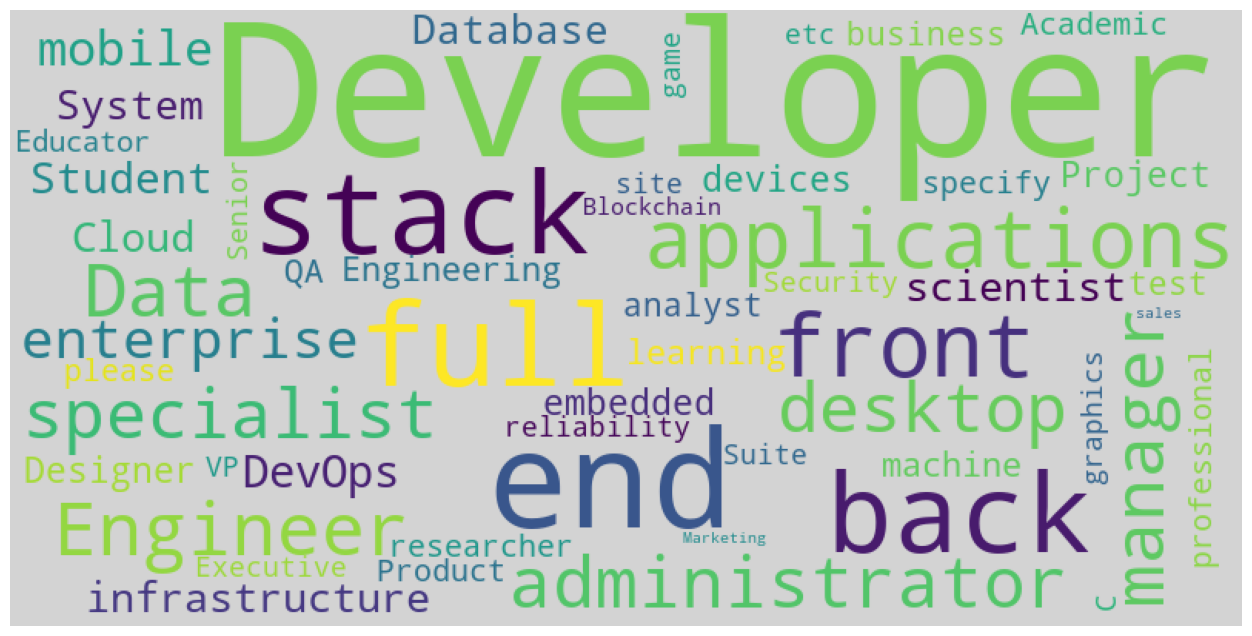

In [186]:
# 한글이 포함되었다면 한글 폰트를 지정해야 한다.
# font_path=['폰트 경로']wc = WordCloud(collocation_threshold = int(1e6),
# max_font_size = 60 --> 최대 글자 크기를 지정한다.
wc = WordCloud(collocation_threshold=int(1e6),
               width=800, height=400,
               background_color='lightgrey').generate(words)
plt.figure(figsize=(16,8))

# x, y축 그리지 않습니다.
plt.axis('off')
# grid lines를 그리지 않습니다.
plt.grid(False)
plt.imshow(wc)
plt.show()

아래의 명령어를 통해 저장 가능합니다. 다른 이미지 확장자(jpg, gif)도 사용 가능합니다.

In [ ]:
wc.to_file("DevType.png")